In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [0]:
#Loading Data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#Shapes of the dataset
print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape: ', test_images.shape)
print('test_labels.shape: ', test_labels.shape)

train_images.shape:  (60000, 28, 28)
train_labels.shape:  (60000,)
test_images.shape:  (10000, 28, 28)
test_labels.shape:  (10000,)


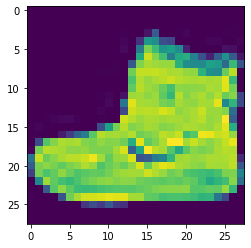

In [0]:
plt.imshow(train_images[0])

In [0]:
train_labels[0]

9

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
# Initializes a sequential model
model = models.Sequential()

# Adding a 2D Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding 1st Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Adding 2nd 2D Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding 2nd Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Adding 3rd 2D Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding a flattening layer to convert Filter maps into 1D Tensor
model.add(layers.Flatten())

# Adding Dense Layer before the outpur layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
# Reshape the Train Image Array for compatible with CNN
train_images = train_images.reshape((60000, 28, 28, 1))

# Normalizing the Train Images
train_images = train_images.astype('float32') / 255

# Reshape the Test Image Array for compatible with CNN
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalizing the Test Images
test_images = test_images.astype('float32') / 255


In [0]:
#Compiling the CNN Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the CNN Model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 50s 53ms/step - loss: 0.5397 - accuracy: 0.8003
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.3328 - accuracy: 0.8774
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 0.2819 - accuracy: 0.8967
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.2506 - accuracy: 0.9079
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.2280 - accuracy: 0.9163


In [0]:
#Evaluate the CNN Model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.2963 - accuracy: 0.8988


In [0]:
test_acc

0.8988000154495239